In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [2]:
data_dir = tf.keras.utils.get_file('flower_photos', origin='datasets',  cache_dir='.', untar=True)

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

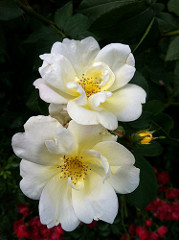

In [8]:
PIL.Image.open(str(roses[0]))

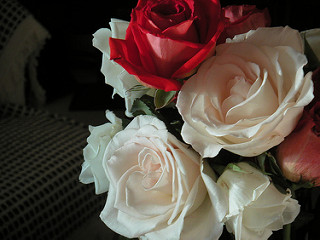

In [9]:
PIL.Image.open(str(roses[1]))

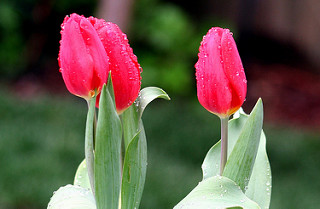

In [10]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [11]:
flowers_image_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunfowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [12]:
flowers_image_dict['roses']

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

In [13]:
flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [14]:
flowers_image_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [15]:
str(flowers_image_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [16]:
img = cv2.imread(str(flowers_image_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [17]:
img.shape

(240, 179, 3)

In [18]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [19]:
x,y = [],[]
for flower_name, images in flowers_image_dict.items():
    print(flower_name)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
0
tulips
799


In [20]:
x,y = [],[]

for flower_name, images in flowers_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [21]:
y[:5]

[0, 0, 0, 0, 0]

In [22]:
x[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [23]:
x = np.array(x)
y = np.array(y)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [25]:
len(x_train)

2228

In [26]:
len(x_test)

743

In [27]:
x[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [28]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [29]:
x_train_scaled[0]

array([[[0.87058824, 0.90588235, 0.95686275],
        [0.87058824, 0.90588235, 0.96078431],
        [0.87843137, 0.91372549, 0.96470588],
        ...,
        [0.65490196, 0.74901961, 0.81960784],
        [0.6       , 0.70588235, 0.76862745],
        [0.55686275, 0.67058824, 0.72941176]],

       [[0.8745098 , 0.90980392, 0.96078431],
        [0.87058824, 0.90588235, 0.95686275],
        [0.86666667, 0.90196078, 0.95294118],
        ...,
        [0.63529412, 0.72941176, 0.8       ],
        [0.59215686, 0.69411765, 0.76078431],
        [0.56470588, 0.6745098 , 0.7372549 ]],

       [[0.87843137, 0.91372549, 0.96470588],
        [0.8745098 , 0.90980392, 0.96078431],
        [0.87058824, 0.90588235, 0.95686275],
        ...,
        [0.61568627, 0.70980392, 0.77647059],
        [0.58431373, 0.68235294, 0.75294118],
        [0.57647059, 0.67843137, 0.74509804]],

       ...,

       [[0.89411765, 0.91764706, 0.9372549 ],
        [0.89803922, 0.9254902 , 0.94509804],
        [0.89411765, 0

In [30]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(x_train_scaled,y_train,epochs=1)

70/70 [==============================] - 79s 1s/step - loss: 1.2964 - accuracy: 0.4264


In [31]:
model.evaluate(x_test_scaled,y_test)

24/24 [==============================] - 8s 311ms/step - loss: 1.0023 - accuracy: 0.5545


[1.0023390054702759, 0.5545087456703186]

In [32]:
predictions = model.predict(x_test_scaled)
predictions

24/24 [==============================] - 7s 256ms/step


array([[ 0.59481215,  1.0821526 ,  1.6097635 , -3.462921  ,  0.8333124 ],
       [ 1.0177637 ,  1.363253  ,  1.7112283 , -4.172754  ,  0.9858339 ],
       [ 4.8831058 , -0.80436933, -3.2756305 , -7.502195  ,  5.1948404 ],
       ...,
       [ 0.16447973,  1.2862775 ,  2.7630265 , -4.2487855 ,  1.2649611 ],
       [ 0.7777747 ,  1.5521704 ,  1.2520865 , -4.66376   ,  1.7207996 ],
       [ 2.9701521 ,  0.2597478 , -1.4937036 , -5.0284805 ,  2.4380953 ]],
      dtype=float32)

In [33]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.14983872, 0.24393456, 0.41343936, 0.00259044, 0.19019689],
      dtype=float32)>

In [34]:
np.argmax(np.array([score]))

2

In [35]:
y_test[0]

2

In [36]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.9),
])

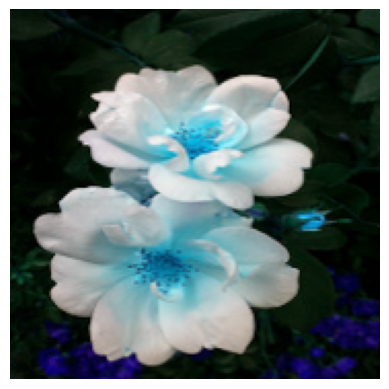

In [37]:
plt.axis('off')
plt.imshow(x[0])

In [38]:
data_augmentation(x)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[12.76705   , 29.02527   , 16.572104  ],
        [13.462657  , 29.87782   , 16.671814  ],
        [15.163923  , 29.289782  , 16.830326  ],
        ...,
        [21.156935  , 47.305656  , 31.69868   ],
        [23.07143   , 48.86227   , 33.876484  ],
        [23.321493  , 48.830326  , 33.969604  ]],

       [[13.534189  , 29.454752  , 16.649698  ],
        [13.9325    , 30.740196  , 17.        ],
        [14.435263  , 29.409266  , 16.75993   ],
        ...,
        [19.596966  , 45.51285   , 30.097084  ],
        [19.434034  , 46.106728  , 30.241722  ],
        [19.810999  , 46.68128   , 29.875858  ]],

       [[14.672195  , 29.194946  , 16.93357   ],
        [15.090857  , 30.980263  , 17.415525  ],
        [16.26281   , 31.017555  , 18.368221  ],
        ...,
        [15.061861  , 35.08927   , 23.378098  ],
        [14.272422  , 35.72081   , 22.162327  ],
        [13.730928  , 37.20048   , 22.31697   ]],

       ...,

     

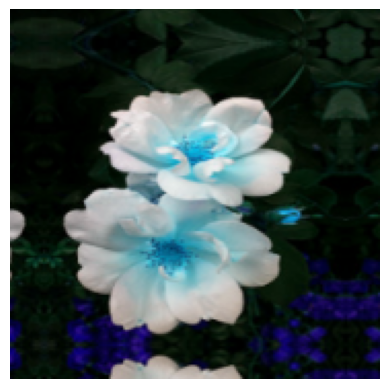

In [39]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype('uint8'))

In [42]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(x_train_scaled,y_train,epochs=1)

70/70 [==============================] - 78s 1s/step - loss: 1.1803 - accuracy: 0.4654


In [43]:
model.evaluate(x_test_scaled,y_test)

24/24 [==============================] - 8s 294ms/step - loss: 1.0796 - accuracy: 0.4845


[1.0795537233352661, 0.4845221936702728]